┌ Info: Saved animation to g:\Meine Ablage\Codes\Projects\Double Pendulumn\double_pendulum.gif
└ @ Plots C:\Users\Julianus\.julia\packages\Plots\p3KMq\src\animation.jl:156


Plots.AnimatedGif("g:\\Meine Ablage\\Codes\\Projects\\Double Pendulumn\\double_pendulum.gif")
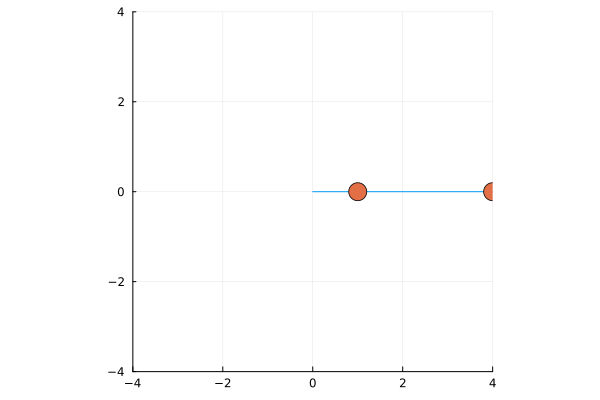

In [12]:
using Plots
using DifferentialEquations

function double_pendulum_animation(θ1₀::Float64, θ2₀::Float64, L1::Float64, L2::Float64, m1::Float64, m2::Float64, g_1::Float64, t_end::Float64, dt::Float64)
    θ1 = θ1₀
    θ2 = θ2₀
    ω1 = 0.0
    ω2 = 0.0
    g1 = g_1
    
    function double_pendulum(du, u, p, t)
        θ1, θ2, ω1, ω2 = u
        m1, m2, L1, L2, g1 = p
        
        c = cos(θ1 - θ2)
        s = sin(θ1 - θ2)
        θ1̇ = ω1
        θ2̇ = ω2
        ω1̇ = (m2 * g1 * sin(θ2) * c - m2 * s * (L1 * ω1^2 * c + L2 * ω2^2) - (m1 + m2) * g1 * sin(θ1)) / (L1 * (m1 + m2 * s^2))
        ω2̇ = ((m1 + m2) * (L1 * ω1^2 * s - g1 * sin(θ2) + g1 * sin(θ1) * c) + m2 * L2 * ω2^2 * s * c) / (L2 * (m1 + m2 * s^2))
        
        du[1] = θ1̇
        du[2] = θ2̇
        du[3] = ω1̇
        du[4] = ω2̇
    end
    
    tspan = (0.0, t_end)
    u₀ = [θ1, θ2, ω1, ω2]
    p = [m1, m2, L1, L2, g1]
    
    sol = solve(ODEProblem(double_pendulum, u₀, tspan, p), Vern7(), abstol=1e-10, reltol=1e-10)
    
    anim = @animate for i = 1:length(sol.t)
        θ1 = sol[i][1]
        θ2 = sol[i][2]
        x1 = L1 * sin(θ1)
        y1 = -L1 * cos(θ1)
        x2 = x1 + L2 * sin(θ2)
        y2 = y1 - L2 * cos(θ2)
        
        plot([0, x1, x2], [0, y1, y2], aspect_ratio = :equal, xlims=(-(L1 + L2), (L1 + L2)), ylims=(-(L1 + L2), (L1 + L2)), legend=false)
        scatter!([x1, x2], [y1, y2], markersize=[10, 10])
    end
    
    return anim
end

# Parameters
θ1₀ = π / 2
θ2₀ = π / 2
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0
g_1 = 9.81
t_end = 10.0
dt = 0.05

# Generate animation
anim = double_pendulum_animation(θ1₀, θ2₀, L1, L2, m1, m2, g_1, t_end, dt)
gif(anim, "double_pendulum.gif", fps = 30)


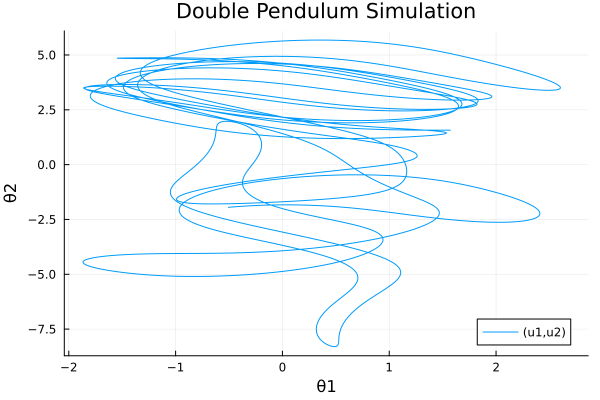

In [1]:
using DifferentialEquations, Plots

function double_pendulum!(du, u, p, t)
    m1, m2, l1, l2, g = p
    θ1, θ2, ω1, ω2 = u

    c = cos(θ1 - θ2)
    s = sin(θ1 - θ2)

    du[1] = ω1
    du[2] = ω2

    den1 = (m1 + m2) * l1 - m2 * l1 * c^2
    den2 = (l2 / l1) * den1

    du[3] = (m2 * l1 * ω1^2 * s * c + m2 * g * sin(θ2) * c + m2 * l2 * ω2^2 * s - (m1 + m2) * g * sin(θ1)) / den1
    du[4] = (-m2 * l2 * ω2^2 * s * c + (m1 + m2) * g * sin(θ1) * c - (m1 + m2) * l1 * ω1^2 * s - (m1 + m2) * g * sin(θ2)) / den2
end

# Parameters
m1 = 1.0
m2 = 1.0
l1 = 1.0
l2 = 1.0
g = 9.81

p = [m1, m2, l1, l2, g]
u0 = [π / 2, π / 2, 0.0, 0.0]
tspan = (0.0, 10.0)

prob = ODEProblem(double_pendulum!, u0, tspan, p)
sol = solve(prob, Tsit5())

plot(sol, idxs=(1, 2), xlabel="θ1", ylabel="θ2", title="Double Pendulum Simulation")
